# Do necessary imports

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

# Read an image using OpenCV (BGR)

In [ ]:
cat = cv2.imread('cat.png')
plt.imshow(cat)
plt.show()

# Print color information

In [ ]:
print(cat.shape)
cat

# Read an image in the RGB order

In [ ]:
cat = cv2.imread('cat.png')
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat_rgb)
plt.show()

In [ ]:
print(cat_rgb.shape)
cat_rgb

 # Most geometry features are applied to grayscale image

In [ ]:
cat = cv2.imread('cat.png')
cat_gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
print(cat_gray)#.shape) # prints color information
print(cat_gray.shape)
plt.imshow(cat_gray)
plt.show()

# Geometry features:

## 1- Image Gradients

In [ ]:
#Show an image
img = cv2.imread('gothenburg_1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
img = cv2.imread('gothenburg_1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# depending on the direction of the derivatives
# Sobel X: vertical , Sobel Y: horizontal, Laplacian: in both directions

plt.show()

 ## 2- Canny Edge Detection
 
 - edge detection algorithm which removes the noise in the image with a 5x5 Gaussian filter.

In [ ]:
f = 'cat.png'
img = cv2.imread('cat.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


## 3- SIFT FEATURES
 
  

In [ ]:
gothenburg_1 = cv2.imread('gothenburg_2.jpg')
gothenburg_1_rgb = cv2.cvtColor(gothenburg_1, cv2.COLOR_BGR2RGB)
gothenburg_2 = cv2.imread('gothenburg_3.jpg')
gothenburg_2_rgb = cv2.cvtColor(gothenburg_2, cv2.COLOR_BGR2RGB)
plt.imshow(gothenburg_1_rgb)
plt.show()
plt.imshow(gothenburg_2_rgb)
plt.show()

In [ ]:
# Read images
# grayscale for detecting important features!
img1 = cv2.cvtColor(gothenburg_1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(gothenburg_2, cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(img1)
plt.show()


In [ ]:
plt.imshow(img2)
plt.show()

In [ ]:
#Detect SIFT features
image1 = cv2.imread("gothenburg_1.jpg")
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create() # how many key points we want
(kp1, des1) = sift.detectAndCompute(gray1, None)
print("# kp1: {}, descriptors: {}".format(len(kp1), des1.shape))

#Detect SURF features
surf = cv2.xfeatures2d.SURF_create()
(kp11, des11) = surf.detectAndCompute(gray1, None)
print("# kp11: {}, descriptors: {}".format(len(kp11), des11.shape))

In [ ]:
#Detect SIFT features
image2 = cv2.imread("gothenburg_2.jpg")
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
(kp2, des2) = sift.detectAndCompute(gray2, None)
print("# kp2: {}, descriptors: {}".format(len(kp2), des2.shape))

#Detect SURF features
surf = cv2.xfeatures2d.SURF_create()
(kp22, des22) = surf.detectAndCompute(gray2, None)
print("# kp22: {}, descriptors: {}".format(len(kp22), des22.shape))


In [ ]:
# Visualize kp 
img1=cv2.drawKeypoints(gray1, kp1, image1)
plt.imshow(img1)
plt.show()


In [2]:
img2=cv2.drawKeypoints(gray2, kp2, image2)
plt.imshow(img2)
plt.show()

NameError: name 'cv2' is not defined

# Feature Matching

In [ ]:
# Helper function: some functionalities in OpenCV still do not have a python interface.
# instead, I found this helper function on the Internet.
# Source: http://stackoverflow.com/questions/20259025/module-object-has-no-attribute-drawmatches-opencv-python


def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    cv2.imshow('Matched Features', out)
    cv2.waitKey(0)
    cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out


In [1]:
img1 = cv2.imread('gothenburg_2.jpg', 0) # Original image - ensure grayscale
img2 = cv2.imread('gothenburg_3.jpg', 0) # Rotated image - ensure grayscale

# Create ORB detector with 1000 keypoints with a scaling pyramid factor
# of 1.2
#orb = cv2.ORB(1000, 1.2)
orb = cv2.ORB_create(1000, 1.2)


# Detect keypoints of original image
(kp1,des1) = orb.detectAndCompute(img1, None)

# Detect keypoints of rotated image
(kp2,des2) = orb.detectAndCompute(img2, None)

# Create matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Do matching
matches = bf.match(des1,des2)

# Sort the matches based on distance.  Least distance
# is better
matches = sorted(matches, key=lambda val: val.distance)

# Show only the top 10 matches - also save a copy for use later
out = drawMatches(img1, kp1, img2, kp2, matches[:10])


NameError: name 'cv2' is not defined

# Find good matches using FLANN library

405
[[<DMatch 0x1231a5930>], [<DMatch 0x1231a5ad0>], [<DMatch 0x12321e370>], [<DMatch 0x12321e430>], [<DMatch 0x12321e4b0>], [<DMatch 0x12321e4f0>], [<DMatch 0x12321e5f0>], [<DMatch 0x12321e8b0>], [<DMatch 0x12321e930>], [<DMatch 0x12321eab0>], [<DMatch 0x12321eb70>], [<DMatch 0x12320f530>], [<DMatch 0x12320f5b0>], [<DMatch 0x12320f5f0>], [<DMatch 0x12320f7b0>], [<DMatch 0x12320f830>], [<DMatch 0x12320f9b0>], [<DMatch 0x12320fc30>], [<DMatch 0x12320ff70>], [<DMatch 0x12320ffb0>], [<DMatch 0x125dd2770>], [<DMatch 0x125dd9370>], [<DMatch 0x125dd9e30>]]
23


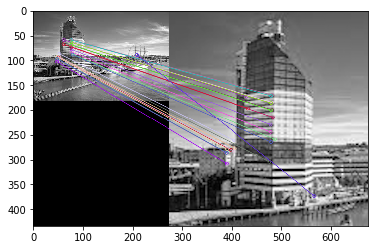

In [7]:
img1 = cv2.imread('gothenburg_2.jpg',0)  # queryImage
img2 = cv2.imread('gothenburg_3.jpg',0) # trainImage

# Initiate ORB detector

orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


# FLANN parameters

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks = 50) # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)
print (len(matches))


# Need to draw only good matches, so create a mask
good = []
good_without_list = []
i = 0
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m]) #kp1[i]
        good_without_list.append(m)
    i += 1

print (list(good))
print (len(good))

knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
plt.imshow(knn_image)
plt.show()
 
    

# Detection of people

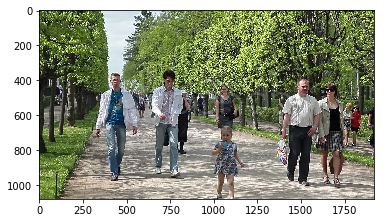

In [8]:
#children = cv2.imread ('children.jpg')
#children = cv2.imread ('people.jpg')
children = cv2.imread ('people_2.jpg')
#children = cv2.imread ('dancing_babies.jpg')
children = cv2.cvtColor(children, cv2.COLOR_BGR2RGB)
plt.imshow(children)
plt.show()

In [9]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [11]:
found, w = hog.detectMultiScale(children, winStride=(8,8), padding=(24,24), scale=1.05)

In [12]:
for (x, y, w, h) in found:
    cv2.rectangle(children, (x, y), (x+w, y+h), (0, 255, 0), 2)

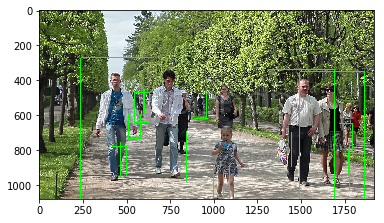

In [13]:
plt.imshow(children)
plt.show()

You could find an example about how to create visual  bag-of-words here: https://github.com/bikz05/bag-of-words